In [1]:
import xarray as xr
import pandas as pd
# 使用open_dataset函数打开NetCDF文件
data = xr.open_dataset("/home/rice/cosipy/data/output/kqgr_test_20220601-20220930.nc")


In [10]:
plot_data = data.mean(dim=['lat','lon']).to_dataframe().reset_index()

# 假设 df 是你的 DataFrame，包含所有这些列
# 定义需要求和和求平均的变量
sum_vars = [
    'RRR', 'SNOWFALL', 'RAIN', 'EVAPORATION', 'SUBLIMATION', 
    'CONDENSATION', 'DEPOSITION', 'REFREEZE', 'subM', 'surfM', 
    'surfMB', 'MB','intMB'
]

mean_vars = [
    'T2', 'LWin', 'H', 'LE', 'B','ALBEDO','LWout','TS', 'G','ME'
]

# 为 DataFrame 中的列指定不同的聚合方法
agg_dict = {var: 'sum' for var in sum_vars}
agg_dict.update({var: 'mean' for var in mean_vars})

# 示例：假设你已经有一个 DataFrame df，并且 TIMESTAMP 列是时间戳
plot_data['time'] = pd.to_datetime(plot_data['time'])  # 确保 TIMESTAMP 列是 datetime 类型

# 按小时进行重采样，并使用不同的聚合方法
df_hour = plot_data.resample('H', on='time').agg(agg_dict).reset_index()
df_month = plot_data.resample('M', on='time').agg(agg_dict).reset_index()
df_day = plot_data.resample('D', on='time').agg(agg_dict).reset_index()
df_year = plot_data.resample('Y', on='time').agg(agg_dict).reset_index()

# 提取年月并创建新的列
df_month['year_month'] = df_month['time'].dt.to_period('M')
df_month['year_month'] = df_month['year_month'].dt.strftime('%Y-%m')

# 提取年月并创建新的列
df_year['year'] = df_year['time'].dt.to_period('Y')
df_year['year'] = df_year['year'].dt.strftime('%Y')

/tmp/ipykernel_5605/4118138332.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour = plot_data.resample('H', on='time').agg(agg_dict).reset_index()
/tmp/ipykernel_5605/4118138332.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = plot_data.resample('M', on='time').agg(agg_dict).reset_index()
/tmp/ipykernel_5605/4118138332.py:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_year = plot_data.resample('Y', on='time').agg(agg_dict).reset_index()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

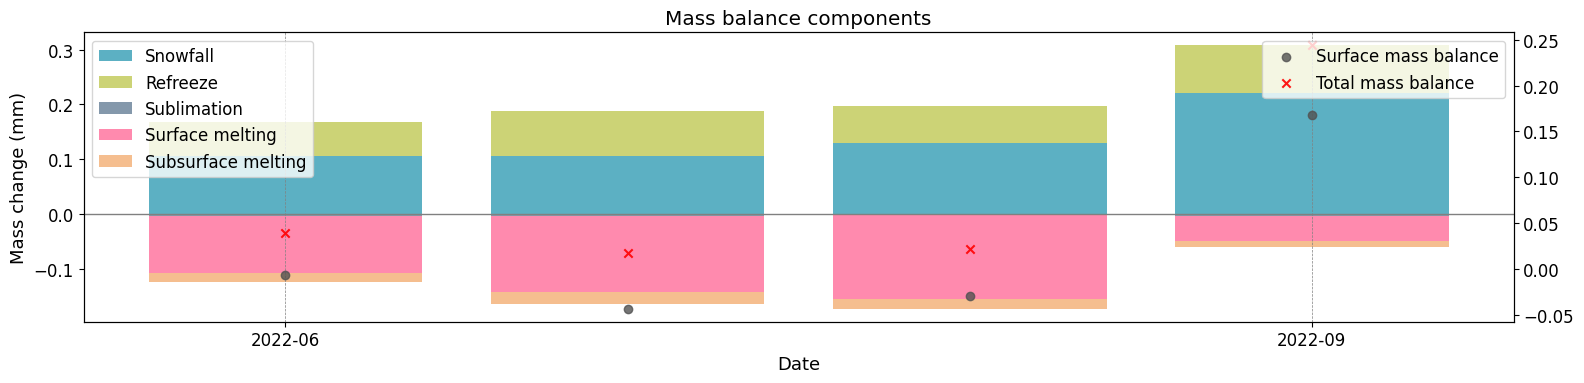

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 假设 df_month 已经存在
# 设置时间戳为 x 轴
timestamps = df_month['year_month']

# 设置全局字体大小为12
plt.rcParams['font.size'] = 12  # 设置全局字体大小
plt.rcParams['axes.labelsize'] = 13  # 设置坐标轴标签字体大小

plt.rcParams['font.family'] = 'Arial'

# 设置饱和度适中的调色板
colors = {
    'SNOWFALL': '#5cb0c3',  # 温和的中蓝色
    'REFREEZE': '#ccd376',  # 柔和的中绿色
    'SUBLIMATION': '#8498ab',  # 温暖的橙色
    'surfM': '#FF8AAE',  # 中等鲜艳的红色
    'subM': '#f5be8f',  # 柔和的紫色
    'surfMB': '#525252'  # 深灰色
}

# 创建堆积柱状图
fig, ax = plt.subplots(figsize=(16, 4))

ax.bar(timestamps, df_month['SNOWFALL'], label='Snowfall', color=colors['SNOWFALL'])
ax.bar(timestamps, df_month['REFREEZE'], bottom=df_month['SNOWFALL'], label='Refreeze', color=colors['REFREEZE'])
ax.bar(timestamps, df_month['SUBLIMATION'], bottom=0, label='Sublimation', color=colors['SUBLIMATION'])
ax.bar(timestamps, -df_month['surfM'], bottom=df_month['SUBLIMATION'], label='Surface melting', color=colors['surfM'])
ax.bar(timestamps, -df_month['subM'], bottom=df_month['SUBLIMATION'] - df_month['surfM'], label='Subsurface melting', color=colors['subM'])

# 创建第二个 y 轴 (ax2)，共享 x 轴
ax2 = ax.twinx()

# 在 ax2 上添加散点图
ax2.scatter(timestamps, df_month['surfMB'], label='Surface mass balance', color=colors['surfMB'], alpha=0.8)
ax2.scatter(timestamps, df_month['MB'], label='Total mass balance', color='red', marker='x', alpha=0.9)  # 更换蓝色并添加透明度

# 设置标题和标签
ax.set_title('Mass balance components')
ax.set_xlabel('Date')
ax.set_ylabel('Mass change (mm)')
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1)  # 添加 y=0 的横线

# 添加图例（合并两个图例）
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# 设置 X 轴的 tick 间隔（比如每隔 3 个标签显示一个）
ax.set_xticks(timestamps[::3])  # 每隔 3 个时间点显示一个标签
ax.set_xticklabels(timestamps[::3])  # 不旋转标签

# 添加竖直的网格线
ax.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray')  # 竖直网格线

# 显示图表
plt.tight_layout()
plt.show()
